Задание 3.5.1

In [196]:
''' 
1. Удалите строки, где есть хотя бы один пропуск.

2. Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно(!) с помощью функции RobustScaler(). 

3. Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77.  

4. Вычислите MSE , ответ запишите с точностью до сотых. 

Не забудьте, что id не несет никакой содержательной информации,поэтому не надо брать его в качестве предиктора! 

Также не забудьте,что мы логарифмировали зависимую переменную,а значит при подсчете MSE необходимо найти экспоненциальную функцию от ! 

*** ? Округлите ответ до целых.  <<<<>>>>>   4. Вычислите MSE , ответ запишите с точностью до сотых. ??????
'''

' \n1. Удалите строки, где есть хотя бы один пропуск.\n\n2. Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно(!) с помощью функции RobustScaler(). \n\n3. Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77.  \n\n4. Вычислите MSE , ответ запишите с точностью до сотых. \n\nНе забудьте, что id не несет никакой содержательной информации,поэтому не надо брать его в качестве предиктора! \n\nТакже не забудьте,что мы логарифмировали зависимую переменную,а значит при подсчете MSE необходимо найти экспоненциальную функцию от ! \n\n*** ? Округлите ответ до целых.  <<<<>>>>>   4. Вычислите MSE , ответ запишите с точностью до сотых. ??????\n'

In [197]:
import numpy as np
import pandas as pd
# from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
# from sklearn.model_selection import train_test_split
import csv
from matplotlib import pyplot as plt

In [198]:
data = pd.read_csv("data_flats2.csv",sep=';') # 

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

In [200]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

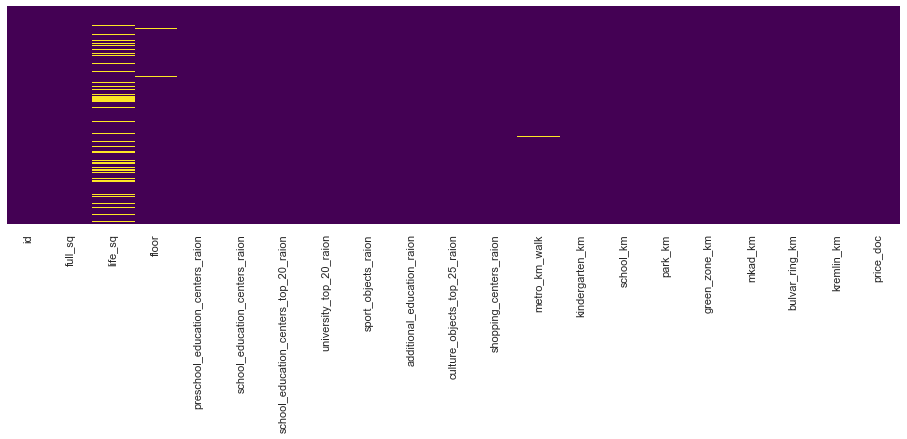

In [201]:
import seaborn as sns  # Или можно оценить визуально количество пропусков и их распределение:
fig, ax = plt.subplots(figsize=(16,4))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

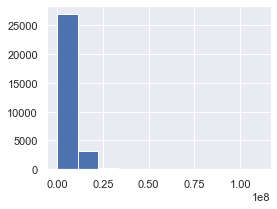

In [202]:
fig, ax = plt.subplots(figsize=(4,3))
data.price_doc.hist()

In [203]:
# fig, ax = plt.subplots(figsize=(4,3))
# data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
# data.price_doc.hist()

<AxesSubplot:>

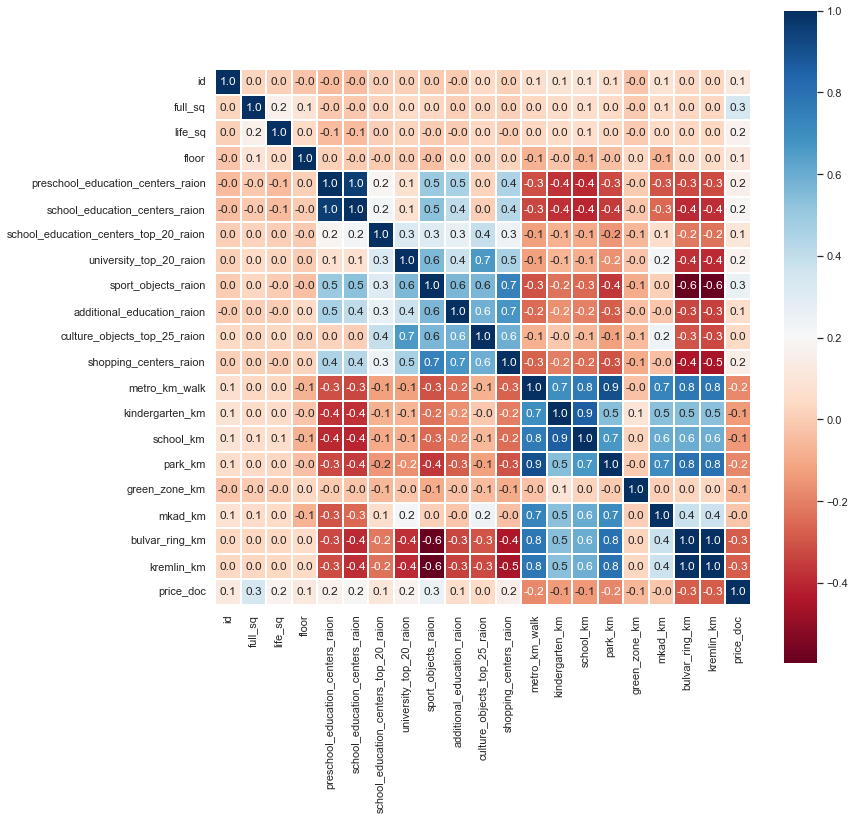

In [204]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [205]:
'''
0 id        0 удалить
1 full_sq   1 полный кв  удалить
2 life_sq
3 floor
4 preschool_education_centers_raion   4 центра дошкольного образования  удалить
5 school_education_centers_raion
6 school_education_centers_top_20_raion
7 university_top_20_raion
8 sport_objects_raion
9 additional_education_raion
10 culture_objects_top_25_raion
11 shopping_centers_raion
12 metro_km_walk
13 kindergarten_km     13 детсадовских км  удалить
14 school_km
15 park_km             15 парковых км  удалить
16 green_zone_km
17 mkad_km
18 bulvar_ring_km
19 kremlin_km          19 кремлевских км  удалить
20 price_doc
'''
data_1=data.drop(['id','full_sq','preschool_education_centers_raion','kindergarten_km','park_km','kremlin_km'],axis=1)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   life_sq                                24086 non-null  float64
 1   floor                                  30302 non-null  float64
 2   school_education_centers_raion         30469 non-null  int64  
 3   school_education_centers_top_20_raion  30469 non-null  int64  
 4   university_top_20_raion                30469 non-null  int64  
 5   sport_objects_raion                    30469 non-null  int64  
 6   additional_education_raion             30469 non-null  int64  
 7   culture_objects_top_25_raion           30469 non-null  int64  
 8   shopping_centers_raion                 30469 non-null  int64  
 9   metro_km_walk                          30444 non-null  float64
 10  school_km                              30469 non-null  float64
 11  gr

In [206]:
data_1.isnull().sum()

life_sq                                  6383
floor                                     167
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
school_km                                   0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
price_doc                                   0
dtype: int64

In [207]:
'''1. Удалите строки, где есть хотя бы один пропуск.'''
data_2=data_1.dropna(axis=0)

In [208]:
data_2.isnull().sum()

life_sq                                  0
floor                                    0
school_education_centers_raion           0
school_education_centers_top_20_raion    0
university_top_20_raion                  0
sport_objects_raion                      0
additional_education_raion               0
culture_objects_top_25_raion             0
shopping_centers_raion                   0
metro_km_walk                            0
school_km                                0
green_zone_km                            0
mkad_km                                  0
bulvar_ring_km                           0
price_doc                                0
dtype: int64

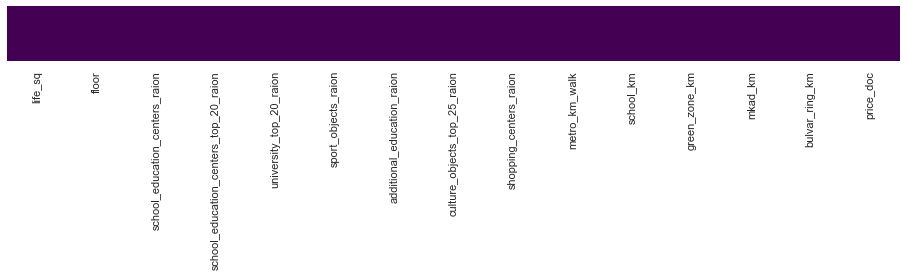

In [209]:
fig, ax = plt.subplots(figsize=(16,1))
sns_heatmap = sns.heatmap(data_2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [210]:
'''тестовой и для обучающей выборки отдельно(!) взяв тестовую выборку размера 0.2, random_state=77.  '''
from sklearn.model_selection import train_test_split

In [211]:
x_train, x_test, y_train, y_test = train_test_split(data_2, data_2.iloc[:,14], test_size=0.2,random_state=77)
print('X_train:', x_train.shape)
print('X_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (19140, 15)
X_test: (4785, 15)
y_train: (19140,)
y_test: (4785,)


In [212]:
# y_train.shape + 1-------------------------------------
df_1 = pd.DataFrame(y_train, columns=['price_doc'])
df_2 = pd.DataFrame(np.zeros(len(y_train)), columns=['y_train+1']) # np.ones(len(y_train)), columns=['y_train+1'])
# print('df_1.shape',df_1.shape,'df_2.shape',df_2.shape)

np_df_1=df_1[:].to_numpy()
np_df_2=df_1[:].to_numpy()   #  np.ones(len(y_train)

y_train_np = np.append (np_df_1, np_df_2,axis=1)
# print(y_train_np.shape)
type(y_train_np[1,1])
#-------------------------------------------------------len(y_test) 4785
df_3 = pd.DataFrame(y_test, columns=['price_doc'])
df_4 = pd.DataFrame(np.zeros(len(y_test)), columns=['y_test+1']) # np.ones(len(y_test)), columns=['y_test+1'])

np_df_3=df_3[:].to_numpy()
np_df_4=df_4[:].to_numpy()   #  np.ones(len(y_test)

y_test_np = np.append (np_df_3, np_df_4,axis=1)
print('y_train_np.shape',y_train_np.shape,'y_test_np.shape',y_test_np.shape)

y_train_np.shape (19140, 2) y_test_np.shape (4785, 2)


In [213]:
from sklearn.preprocessing import RobustScaler

In [214]:
#-----------------------------------------
transformer = RobustScaler().fit(x_train)
transformer
x_train_1=transformer.transform(x_train)
#-----------------------------------------
transformer = RobustScaler().fit(x_test)
transformer
x_test_1=transformer.transform(x_test)
#-----------------------------------------
transformer = RobustScaler().fit(y_train_np)  #  ---> 10 transformer = RobustScaler().fit(y_train)  ValueError: Expected 2D array, got 1D array instead:
transformer
y_train_1=transformer.transform(y_train_np)
# ###y_train_1=y_train_np
# # #-----------------------------------------
transformer = RobustScaler().fit(y_test_np)
transformer
y_test_1=transformer.transform(y_test_np)
# ###y_test_1=y_test_np
# #-----------------------------------------
print('y_train_1.shape',y_train_1.shape,'y_test_1.shape',y_test_1.shape)

y_train_1.shape (19140, 2) y_test_1.shape (4785, 2)


In [215]:
y_train = np.delete(y_train_1, [1], 1)
print('y_train.shape',y_train.shape)

y_test = np.delete(y_test_1, [1], 1)
print('y_test.shape',y_test.shape)


y_train.shape (19140, 1)
y_test.shape (4785, 1)


In [216]:
from sklearn.linear_model import LinearRegression
predictor = LinearRegression()
predictor.fit(x_train, y_train)
y_pred = predictor.predict(x_test)
y_pred

array([[ 0.01351351],
       [ 0.2972973 ],
       [-0.28378378],
       ...,
       [-0.54054054],
       [-0.06756757],
       [ 0.21621622]])

In [217]:
from sklearn.metrics import mean_squared_error # MSE
mean_squared_error(y_test, y_pred)

0.005575128053826223

In [225]:
from sklearn import metrics  # подгружаем метрики
MSE = metrics.mean_squared_error(np.exp(y_test) - 1, np.exp(y_pred) - 1)
MSE

1.2268560034123552e+22

In [218]:
mean_squared_error(y_test, y_pred, squared=False)

0.07466678012226202

In [219]:
mean_squared_error(y_test, y_pred, multioutput='raw_values')

array([0.00557513])

In [220]:
#  mean_squared_error(y_test, y_pred, multioutput=[0.05, 1]) # ???

In [224]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)

0.026254826254826724

In [226]:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

1.6156156293435906